<a href="https://colab.research.google.com/github/tbeers615/Neural-Style-Transfer/blob/master/Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression With Neural Networks in Tensorflow

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


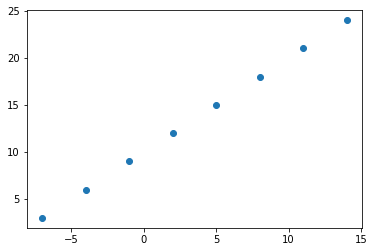

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
x = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(x, y)

# Input and output shapes

In [ ]:
# Create a demo tensor for housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
x = tf.cast(tf.constant(x), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

## Steps in modeling with TensorFlow

1. Creating a model - define the input and output layers, as well as the hidden layers of a deep learning model.
2. Compiling a model - define the loss function (in other words, the function which tells our model how wrong it is) and the omptimizer (Tells our model how to improve the patterns - its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. Fitting a model - letting the model try to find patterns between x & y (features and labels)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), #SGD is Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 306ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out x and y
x,y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

array([[12.716021]], dtype=float32)

 ## Improving the model

 We can improve our model by altering the steps we took to create a model.

 1. **Creating a model** - here we might add more layers, increase the number of hidden units (neurons) within each of the hidden layers, change the activation function of each layer.
 2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
 3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from)

In [ ]:
# Let's rebuild the model with more epochs

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), #SGD is Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

# MAE: 6.8963

Epoch 1/100
1/1 [==============================] - 0s 287ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 9ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 8ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# Check the new model performance
model.predict([17.0])

array([[29.834618]], dtype=float32)

In [ ]:
# Changing the activation layer
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), #SGD is Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

# MAE: 4.5625

Epoch 1/100
1/1 [==============================] - 0s 405ms/step - loss: 9.3194 - mae: 9.3194
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 9.0655 - mae: 9.0655
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 8.8116 - mae: 8.8116
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 8.5577 - mae: 8.5577
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 8.3038 - mae: 8.3038
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 8.0499 - mae: 8.0499
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.7959 - mae: 7.7959
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.5420 - mae: 7.5420
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2881 - mae: 7.2881
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0342 - mae: 7.0342
Epoch 11/100
1/1 [==============================] - 0s 7ms/step - loss:

In [ ]:
# Changing the number of neurons

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), #SGD is Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

# MAE: 13.3807

Epoch 1/100
1/1 [==============================] - 0s 391ms/step - loss: 13.5118 - mae: 13.5118
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 13.5105 - mae: 13.5105
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5092 - mae: 13.5092
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 13.5079 - mae: 13.5079
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 13.5065 - mae: 13.5065
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5052 - mae: 13.5052
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5039 - mae: 13.5039
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5026 - mae: 13.5026
Epoch 9/100
1/1 [==============================] - 0s 6ms/step - loss: 13.5012 - mae: 13.5012
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 13.4999 - mae: 13.4999
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# Changing the number of neurons AND activation

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), #SGD is Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

# MAE: 12.9487 - so neurons don't seem important (at least in this instance)

Epoch 1/100
1/1 [==============================] - 0s 344ms/step - loss: 13.0908 - mae: 13.0908
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0894 - mae: 13.0894
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0879 - mae: 13.0879
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0865 - mae: 13.0865
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0851 - mae: 13.0851
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0836 - mae: 13.0836
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0822 - mae: 13.0822
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0808 - mae: 13.0808
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0793 - mae: 13.0793
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0779 - mae: 13.0779
Epoch 11/100
1/1 [==============================

In [ ]:
# Changing the optimizer

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.Adam(lr=0.0001), # Adam is Stochastic Gradient Descent, lr = learning rate
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 443ms/step - loss: 14.2813 - mae: 14.2813
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2809 - mae: 14.2809
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2804 - mae: 14.2804
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2800 - mae: 14.2800
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2795 - mae: 14.2795
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2791 - mae: 14.2791
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2786 - mae: 14.2786
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 14.2782 - mae: 14.2782
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2777 - mae: 14.2777
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 14.2773 - mae: 14.2773
Epoch 11/100
1/1 [==============================] - 0s 13ms/

In [ ]:
# Adam with activation layer

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.Adam(lr=0.0001), # Adam is Stochastic Gradient Descent, lr = learning rate
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 578ms/step - loss: 13.0597 - mae: 13.0597
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 13.0596 - mae: 13.0596
Epoch 3/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0596 - mae: 13.0596
Epoch 4/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0596 - mae: 13.0596
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 13.0595 - mae: 13.0595
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0595 - mae: 13.0595
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 13.0595 - mae: 13.0595
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 13.0594 - mae: 13.0594
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.0594 - mae: 13.0594
Epoch 10/100
1/1 [==============================] - 0s 14ms/step - loss: 13.0593 - mae: 13.0593
Epoch 11/100
1/1 [==============================] - 0s 19ms/s

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), #SGD is Stochastic Gradient Descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 344ms/step - loss: 12.2020 - mae: 12.2020
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.9481 - mae: 11.9481
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 11.6942 - mae: 11.6942
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 11.4403 - mae: 11.4403
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 11.1864 - mae: 11.1864
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.9325 - mae: 10.9325
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6786 - mae: 10.6786
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.4247 - mae: 10.4247
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 10.1708 - mae: 10.1708
Epoch 10/100
1/1 [==============================] - 0s 5ms/step - loss: 9.9169 - mae: 9.9169
Epoch 11/100
1/1 [==============================] - 0s 6ms

In [ ]:
model.predict([17.0])

array([[32.105488]], dtype=float32)

In [ ]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), # Adam is Stochastic Gradient Descent, lr = learning rate
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 460ms/step - loss: 13.4200 - mae: 13.4200
Epoch 2/100
1/1 [==============================] - 0s 16ms/step - loss: 12.9068 - mae: 12.9068
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 12.4050 - mae: 12.4050
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 11.8998 - mae: 11.8998
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3850 - mae: 11.3850
Epoch 6/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8602 - mae: 10.8602
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 10.3159 - mae: 10.3159
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 9.7422 - mae: 9.7422
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 9.1393 - mae: 9.1393
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.5321 - mae: 8.5321
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# Despite the low MAE the model is overfit

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.SGD(), # Adam is Stochastic Gradient Descent, lr = learning rate
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 402ms/step - loss: 16.3645 - mae: 16.3645
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 15.2538 - mae: 15.2538
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 14.4296 - mae: 14.4296
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.9389 - mae: 13.9389
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4519 - mae: 13.4519
Epoch 6/100
1/1 [==============================] - 0s 20ms/step - loss: 12.9661 - mae: 12.9661
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 12.4790 - mae: 12.4790
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 11.9881 - mae: 11.9881
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 11.4908 - mae: 11.4908
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 10.9845 - mae: 10.9845
Epoch 11/100
1/1 [==============================

In [ ]:
model.predict([17.0])

array([[29.703918]], dtype=float32)

In [ ]:
# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(50, activation=None),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # Mean Absolute Error
              optimizer = tf.keras.optimizers.Adam(lr=0.01), # Adam is Stochastic Gradient Descent, lr = learning rate
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(x, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 387ms/step - loss: 12.5935 - mae: 12.5935
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 11.8304 - mae: 11.8304
Epoch 3/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0619 - mae: 11.0619
Epoch 4/100
1/1 [==============================] - 0s 6ms/step - loss: 10.2860 - mae: 10.2860
Epoch 5/100
1/1 [==============================] - 0s 6ms/step - loss: 9.4991 - mae: 9.4991
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 8.6976 - mae: 8.6976
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8786 - mae: 7.8786
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 7.0401 - mae: 7.0401
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 6.7836 - mae: 6.7836
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 7.2244 - mae: 7.2244
Epoch 11/100
1/1 [==============================] - 0s 14ms/step - loss: 7.608

In [ ]:
model.predict([17.0])

array([[26.52829]], dtype=float32)

In [ ]:
# Best model is a mix of changing the learning rate and adding a new layer WITHOUT activation
# The most powerful change came from increasing the learning rate

## Evaluating a model
In practice, a typical workflow you'll go through when building neural networks is:

Build a model -> fit it -> evaluate it -> tweak -> fit it -> evaluate it...

When it comes to evaluation there are three words you should memorize: visualize, visualize, visualize

It's a good idea to visualize:


*   The data - what data are we working with? What does it look like?
*   The model itself - what does the model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?



In [ ]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
y = x + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

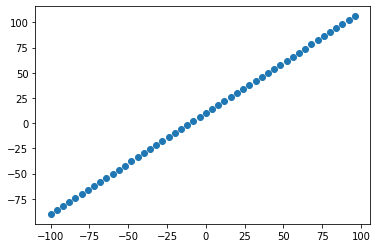

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(x,y)

### The 3 sets...



1.   **Training set** - the model learns from this data - which is typically 70-80% of the data
2.   **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
3. **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the data available.



In [ ]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training (80% of the data)
y_train = y[:40]

x_test = x[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

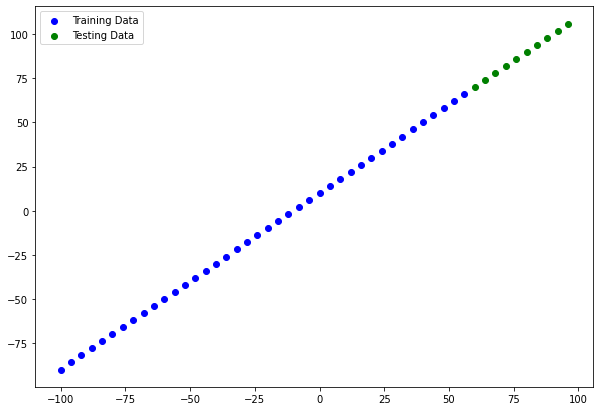

In [ ]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training Data")
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Testing Data")
# Show a legend
plt.legend();

In [ ]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(x_train, y_train, epochs=100)

In [ ]:
# Let's create a model which builds automatically by defining the
# input_shape argument
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="one")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainabale params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other mudels during **transfer learning**).

In [ ]:
# Let's fit the model do our data
model.fit(x_train, y_train, epochs=100, verbose=0)

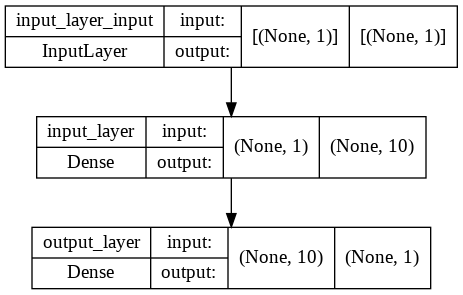

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

## Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions)

In [ ]:
# Make some predictions
y_pred = model.predict(x_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data = x_train,
                     train_labels = y_train,
                     test_data = x_test,
                     test_labels = y_test,
                     predictions=y_pred):

# Plots training data, test data and compares predictions to ground truth labels

  plt.figure(figsize=(10,7))
  # Plot training data in blue
  plt.scatter(train_data,train_labels,c="b",label="Training data")
  # Plot testing data in green
  plt.scatter(test_data,test_labels,c="g",label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data,predictions,c="r",label="Predictions")
  # Show the legend
  plt.legend()

NameError: ignored

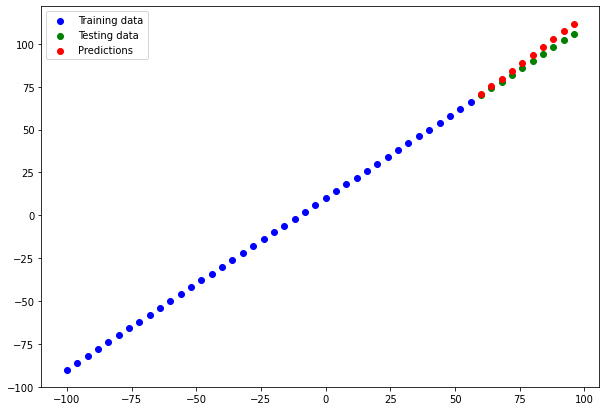

In [ ]:
# Call our newly defined function

plot_predictions()

## Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:

* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(x_test, y_test)

1/1 [==============================] - 0s 131ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true = y_test, y_pred = y_pred)
mae

NameError: ignored

In [ ]:
y_pred

In [ ]:
tf.squeeze(y_pred)

In [ ]:
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test,y_pred=tf.squeeze(y_pred))
mse

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true,y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,y_pred=y_pred)

def mse(y_true,y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,y_pred=y_pred)

## Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in your data.

In [ ]:
x_train, y_train

NameError: ignored

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(x_train, axis=-1), y_train, epochs=100)

NameError: ignored

In [ ]:
# Make and plot predictions
y_preds_1 = model_1.predict(x_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test,tf.squeeze(y_preds_1))
mse_1 = mse(y_test,tf.squeeze(y_preds_1))
mae_1,mse_1

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_2.fit(tf.expand_dims(x_train, axis=-1),y_train,epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 27.4058 - mae: 27.4058
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 24.6339 - mae: 24.6339
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 29.8935 - mae: 29.8935
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 27.4055 - mae: 27.4055
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 14.9463 - mae: 14.9463
Epoch 6/100
2/2 [==============================] - 0s 4ms/step - loss: 11.8819 - mae: 11.8819
Epoch 7/100
2/2 [==============================] - 0s 5ms/step - loss: 11.1988 - mae: 11.1988
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 11.0910 - mae: 11.0910
Epoch 9/100
2/2 [==============================] - 0s 4ms/step - loss: 40.4763 - mae: 40.4763
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 27.8688 - mae: 27.8688
Epoch 11/100
2/2 [==============================] - 0s 3ms/

In [ ]:
y_preds_2 = model_2.predict(x_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
mae_2 = mae(y_test,tf.squeeze(y_preds_2))
mse_2 = mse(y_test,tf.squeeze(y_preds_2))
mae_2,mae_1, mse_2, mse_1

In [ ]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

model_3.fit(tf.expand_dims(x_train, axis=-1),y_train,epochs=500)

In [ ]:
y_preds_3 = model_3.predict(x_test)
plot_predictions(predictions=y_preds_3)

mae_3 = mae(y_test,tf.squeeze(y_preds_3))
mse_3 = mse(y_test,tf.squeeze(y_preds_3))
mae_3,mae_2,mae_1,mse_3,mse_2,mse_1

## Comparing the results of our experiments

We've run a few experiments, let's compare the results.

🔑 **Note**: start with small experiments (small models) and make sure they work before scaling up.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mse_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results,columns=["model","mae","mse"])
all_results

,model,mae,mse
0,model_1,18.745327,353.573364
1,model_2,3.196941,13.070143
2,model_3,68.713615,4808.027344


In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                20        
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Save our best model using the SavedModel format
model_2.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [ ]:
# Save model using the HDF5 format
model_2.save("best_model_HDF5_format.h5")

In [ ]:
## Loading in a saved model format in SavedModel format
loaded_SavedModel_format = tf.keras.models.load_model("best_model_SavedModel_format")

## Download a model (or any other file) from Google Colab

1. You can go to the "files" tab and right-click on the file you're after and click "download".
2. Use code (see the cell below)
3. Save it to Google Drive

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

In [ ]:
# Save it to Google Drive
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/Colab%20Notebooks

### A Larger Example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Let's try one-hot encode our Dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [ ]:
# Create x & y values (features and labels)
x = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
x,y

(      age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0      19  27.900         0           1         0          0           1   
 1      18  33.770         1           0         1          1           0   
 2      28  33.000         3           0         1          1           0   
 3      33  22.705         0           0         1          1           0   
 4      32  28.880         0           0         1          1           0   
 ...   ...     ...       ...         ...       ...        ...         ...   
 1333   50  30.970         3           0         1          1           0   
 1334   18  31.920         0           1         0          1           0   
 1335   18  36.850         0           1         0          1           0   
 1336   21  25.800         0           1         0          1           0   
 1337   61  29.070         0           1         0          0           1   
 
       region_northeast  region_northwest  region_southeast  region_southw

In [ ]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
len(x),len(x_test),len(x_train)

(1338, 268, 1070)

In [ ]:
# Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(x_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.mean(), y_train.median()

(13346.089736364489, 9575.4421)

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.1),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(x_train, y_train, epochs=100)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10879.9834 - mae: 10879.9834
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7538.6685 - mae: 7538.6685
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7259.3555 - mae: 7259.3555
Epoch 4/100
34/34 [==============================] - 0s 1ms/step - loss: 7008.2295 - mae: 7008.2295
Epoch 5/100
34/34 [==============================] - 0s 1ms/step - loss: 6763.3223 - mae: 6763.3223
Epoch 6/100
34/34 [==============================] - 0s 1ms/step - loss: 6511.8413 - mae: 6511.8413
Epoch 7/100
34/34 [==============================] - 0s 1ms/step - loss: 6388.1392 - mae: 6388.1392
Epoch 8/100
34/34 [==============================] - 0s 1ms/step - loss: 6220.3125 - mae: 6220.3125
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6085.1406 - mae: 6085.1406
Epoch 10/100
34/34 [==============================] - 0s 1ms/step - loss: 5924.1436 - mae: 5924.14

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_3.fit(x_train, y_train, epochs=1000)

Epoch 1/1000
34/34 [==============================] - 0s 1ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/1000
34/34 [==============================] - 0s 1ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/1000
34/34 [==============================] - 0s 1ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/1000
34/34 [==============================] - 0s 1ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/1000
34/34 [==============================] - 0s 1ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/1000
34/34 [==============================] - 0s 1ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/1000
34/34 [==============================] - 0s 1ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/1000
34/34 [==============================] - 0s 1ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/1000
34/34 [==============================] - 0s 1ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/1000
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae:

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.1),
                        metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(x_train, y_train, epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 2ms/step - loss: 11886.5977 - mae: 11886.5977
Epoch 2/250
34/34 [==============================] - 0s 3ms/step - loss: 7605.9263 - mae: 7605.9263
Epoch 3/250
34/34 [==============================] - 0s 3ms/step - loss: 7360.0957 - mae: 7360.0957
Epoch 4/250
34/34 [==============================] - 0s 2ms/step - loss: 7195.1470 - mae: 7195.1470
Epoch 5/250
34/34 [==============================] - 0s 2ms/step - loss: 7050.7026 - mae: 7050.7026
Epoch 6/250
34/34 [==============================] - 0s 2ms/step - loss: 6866.8540 - mae: 6866.8540
Epoch 7/250
34/34 [==============================] - 0s 2ms/step - loss: 6676.2456 - mae: 6676.2456
Epoch 8/250
34/34 [==============================] - 0s 2ms/step - loss: 6485.6611 - mae: 6485.6611
Epoch 9/250
34/34 [==============================] - 0s 3ms/step - loss: 6390.3345 - mae: 6390.3345
Epoch 10/250
34/34 [==============================] - 0s 3ms/step - loss: 6312.1816 - mae: 6312.1816
Epoch 11/

In [ ]:
tf.random.set_seed(42)

# 1. Create a model
insurance_model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_5.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.1),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model_5.fit(x_train, y_train, epochs=250)

Epoch 1/250


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 1s 3ms/step - loss: 8710.0215 - mae: 8710.0215
Epoch 2/250
34/34 [==============================] - 0s 2ms/step - loss: 6704.4731 - mae: 6704.4731
Epoch 3/250
34/34 [==============================] - 0s 3ms/step - loss: 5924.8071 - mae: 5924.8071
Epoch 4/250
34/34 [==============================] - 0s 3ms/step - loss: 4553.5469 - mae: 4553.5469
Epoch 5/250
34/34 [==============================] - 0s 4ms/step - loss: 4140.1084 - mae: 4140.1084
Epoch 6/250
34/34 [==============================] - 0s 6ms/step - loss: 3840.4006 - mae: 3840.4006
Epoch 7/250
34/34 [==============================] - 0s 5ms/step - loss: 3947.3435 - mae: 3947.3435
Epoch 8/250
34/34 [==============================] - 0s 5ms/step - loss: 4120.0508 - mae: 4120.0508
Epoch 9/250
34/34 [==============================] - 0s 6ms/step - loss: 3774.4219 - mae: 3774.4219
Epoch 10/250
34/34 [==============================] - 0s 6ms/step - loss: 3749.1438 - mae: 3749.1438
Epoch 11/25

In [ ]:
insurance_model_2.evaluate(x_test,y_test),insurance_model_3.evaluate(x_test,y_test),insurance_model_4.evaluate(x_test,y_test),insurance_model_5.evaluate(x_test,y_test)

9/9 [==============================] - 0s 3ms/step - loss: 1689.6323 - mae: 1689.6323


([3186.845703125, 3186.845703125],
 [4633.22705078125, 4633.22705078125],
 [1892.7279052734375, 1892.7279052734375],
 [1689.63232421875, 1689.63232421875])

Text(0.5, 0, 'epochs')

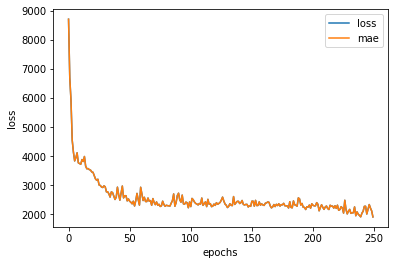

In [ ]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question**: How long should you train for?

It depends! TensorFlow has a solution for this question. It's called the EarlyStopping Callback.



In [ ]:
tf.random.set_seed(42)

callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=10)
# This will stop the training when there's no improvement in 'loss' for 10 epochs


# 1. Create a model
insurance_model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_6.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.1),
                        metrics=["mae"])

# 3. Fit the model
history_2 = insurance_model_6.fit(x_train, y_train, epochs=250,verbose=0,callbacks=[callback])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


ValueError: ignored

In [ ]:
len(history_2.history['loss'])

65

In [ ]:
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

NameError: ignored

In [ ]:
insurance_model_5.evaluate(x_test,y_test),insurance_model_6.evaluate(x_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 2159.9487 - mae: 2159.9487


([1689.63232421875, 1689.63232421875], [2159.94873046875, 2159.94873046875])

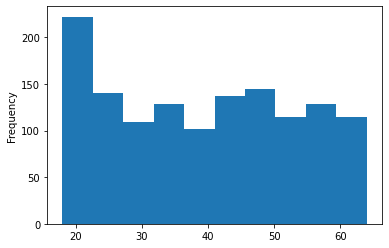

In [ ]:
x["age"].plot(kind="hist")

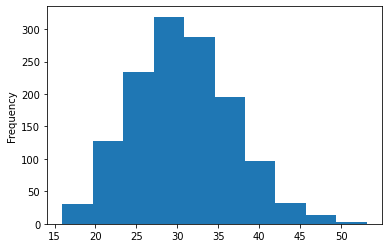

In [ ]:
x["bmi"].plot(kind="hist")

## Preprocessing data (normalization and standardization)
In terms of scaling values, neural networks tend to prefer normalization.

If you're not sure on which to use, you could try both and see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

To prepare our data, we can borrow a few classes from Scikit-Learn.

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age","bmi","children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"),["sex","smoker","region"])
)

# Create x & y
x = insurance.drop("charges",axis=1)
y = insurance["charges"]

# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Fit the column transformer to our training data
ct.fit(x_test)

# Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [ ]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
x_train_normal[0]

array([0.60869565, 0.08765553, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

Beautiful! Our data has been normalized and one hot encoded. Now let us build a model.

In [ ]:
tf.random.set_seed(42)

# callback = tf.keras.callbacks.EarlyStopping(monitor='loss',patience=25)
# This will stop the training when there's no improvement in 'loss' for 10 epochs


# 1. Create a model
insurance_model_normalized = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10,activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_normalized.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(lr=0.1),
                        metrics=["mae"])

# 3. Fit the model
history_normalized_train = insurance_model_normalized.fit(x_train_normal, y_train, epochs=150, verbose=0)
history_normalized_test = insurance_model_normalized.fit(x_test_normal,y_test, epochs=150, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
insurance_model_normalized.evaluate(x_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1800.6543 - mae: 1800.6543


[1800.654296875, 1800.654296875]

Text(0.5, 0, 'epochs')

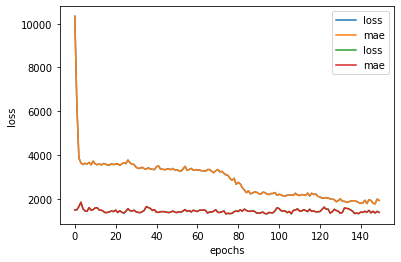

In [ ]:
train_history = pd.DataFrame(history_normalized_train.history)
test_history = pd.DataFrame(history_normalized_test.history)
ax=train_history.plot()
test_history.plot(ax=ax)
plt.ylabel("loss")
plt.xlabel("epochs")

## Model Testing

In [ ]:
y_pred = insurance_model_normalized.predict(x_test_normal)

In [ ]:
r_square = r2_score(y_test,y_pred)
explained_variance = explained_variance_score(y_test,y_pred)
r_square, explained_variance

(0.884695602925685, 0.8912484445164667)

In [ ]:
print(insurance_model_normalized.layers[1].get_weights()[1])

[ 6.8550386  2.7681355 11.773414  -5.3411283 -8.733197  -8.318133
 -8.069323  -3.5789912 -1.6983469 -6.310158 ]
